In [1]:
#importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
dataset=pd.read_csv('Toyota_SimpleReg.csv')
dataset.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 144: invalid start byte

In [3]:
dataset=pd.read_csv('Toyota_SimpleReg.csv',encoding='latin1')
dataset.head()

,Id,Model,Price,Age_06_15
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,57
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,57
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,58
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,60
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,64


In [4]:
dataset.shape

(1436, 4)

In [5]:
dataset.describe()

,Id,Price,Age_06_15
count,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,89.947075
std,416.476890,3626.964585,18.599988
min,1.000000,4350.000000,35.000000
25%,361.750000,8450.000000,78.000000
50%,721.500000,9900.000000,95.000000
75%,1081.250000,11950.000000,104.000000
max,1442.000000,32500.000000,114.000000


In [6]:
#Data Preprocessing and Visualization
dataset.isnull().sum()

Id           0
Model        0
Price        0
Age_06_15    0
dtype: int64

<AxesSubplot:xlabel='Age_06_15', ylabel='Price'>

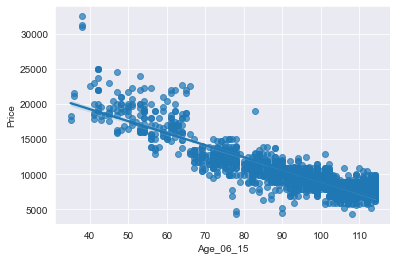

In [7]:
#Scatter Plot

#Plot the Dependent and Independent variables

#This type of plot used to see the relationship between two continuous variables is called as Scatter Plot

sns.regplot(x = 'Age_06_15', y = 'Price', data = dataset, scatter_kws={'alpha':0.7})


In [ ]:
#there is dependace
#it is linear trend

In [8]:
#If you are seeing some two continuous variables, look at co variance and correlation

Covariance=dataset.drop(['Id','Model'],axis=1).cov()

In [9]:
Covariance

,Price,Age_06_15
Price,1.315487e+07,-59136.108946
Age_06_15,-5.913611e+04,345.959566


In [ ]:
#what is Covariance?

In [ ]:
#The covariance of the price of the car and age is -59136.11

#What does the value of the covariance signify?

In [10]:
# Correlation between independent and dependent variable

corr = dataset.drop(['Id','Model'],axis=1).corr()
corr

,Price,Age_06_15
Price,1.00000,-0.87659
Age_06_15,-0.87659,1.00000


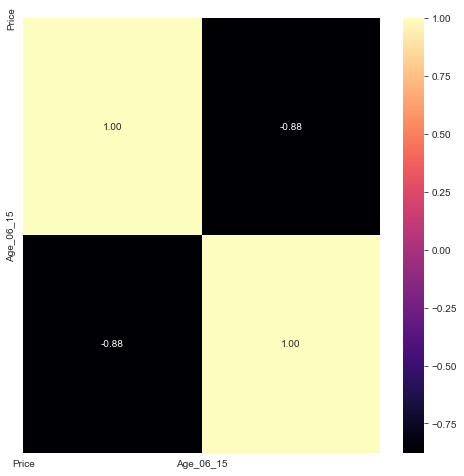

In [11]:
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [ ]:
#The correlation coefficient of the price of the car and age is -0.8765905.
#Since the value is close to 1 and has a -ve sign, we can conclude that the variables are negatively correlated.

In [12]:
dataset=dataset.drop(['Id','Model'],axis=1)

In [13]:
y=dataset['Price']
X = dataset.drop('Price', axis = 1)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 1)
Shape of X_test:  (359, 1)
Shape of y_train:  (1077,)
Shape of y_test (359,)


In [ ]:
#Regression Models 

#Linear Regression 

#from sklearn.linear_model import LinearRegression
#regressor_linear = LinearRegression()
#regressor_linear.fit(X_train, y_train)

In [16]:
#importing Linearregression from linear_model fromsklearn package

from sklearn.linear_model import LinearRegression

#linear regression object creation
regressor_linear = LinearRegression()

#training linearregression model on training data
regressor_linear.fit(X_train, y_train)

#model is created ... regressor_linear

LinearRegression()

In [17]:
regressor_linear.coef_

array([-168.20505329])

In [18]:
regressor_linear.intercept_

25874.23146457897

In [ ]:
"""
h(x)=w_0+w_1x

w_1:co efficient

w_0:intercept
    
h(x)=-168.2x+25874.23

In [ ]:
dir(LinearRegression)

In [ ]:
#how good the model is?

In [19]:
# Predicting RMSE the Test set results

y_pred_linear_test = regressor_linear.predict(X_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print("RMSE test: ", rmse_linear)

RMSE test:  1891.0671919219778


In [20]:
# Predicting RMSE Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)


rmse_linear_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))

print("RMSE_train: ", rmse_linear_train)

RMSE_train:  1694.3574818568286


In [21]:
from sklearn.metrics import r2_score
# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

In [22]:
y_pred_linear_train

array([ 7371.6756031 , 13595.26257469, 18641.41417328, ...,
        6698.85538996,  9558.34129582,  6698.85538996])

In [23]:
y_train

1052     6950
355     13750
170     18245
1328     6900
1040     9500
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1077, dtype: int64

In [24]:
r2_score_linear_train

0.7756152561831979

In [25]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
#cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 5)
#print("CV: ", cv_linear.mean())

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE Test: ", rmse_linear)

R2_score (train):  0.7756152561831979
R2_score (test):  0.7479977884655665
RMSE Test:  1891.0671919219778


In [ ]:
74% of variance  in data is explained by model

In [26]:
X_test

,Age_06_15
594,84
754,102
630,93
1259,105
903,99
...,...
670,93
126,54
1353,114
292,69


In [ ]:
(-168.20505329*84)+25874.23146458

#predicted value at 84

In [27]:
#true value at 84

y_test

594     10800
754      9950
630      7500
1259     9250
903      9750
        ...  
670      5950
126     15950
1353     8250
292     10500
780      9950
Name: Price, Length: 359, dtype: int64

In [ ]:
#You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [28]:
import statsmodels.api as sm

In [ ]:
#By default, the statsmodels library fits a line on the dataset which passes through the origin. 
#But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. 
#And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below




In [ ]:
"""
y=mx

y=mx+c

y=mx+c.1

x+1

m,c

In [29]:
X_train.head()

,Age_06_15
1052,110
355,73
170,43
1328,114
1040,97


In [30]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

C:\Users\krish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
X_train_sm.head()


,const,Age_06_15
1052,1.0,110
355,1.0,73
170,1.0,43
1328,1.0,114
1040,1.0,97


In [ ]:
#y=mx

#y=m(age+1)

In [32]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [33]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params



const        25874.231465
Age_06_15     -168.205053
dtype: float64

In [ ]:
"""

-168.20505329,25874.23146457897

comparing with sklearn implementation

In [34]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3716.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:44:18   Log-Likelihood:                -9535.8
No. Observations:                1077   AIC:                         1.908e+04
Df Residuals:                    1075   BIC:                         1.909e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.587e+04    253.301    102.148      0.0

In [ ]:
#h(x)=-168.20x+25874.23

price=-168.20 age +25874.23


whether w1(m)(theta_1) co-efficient is significant

hypothesis testing on w1


once we perform a linear regression, whether fitted lines is signiuficant one or not

in simple terms, whether w1 is significant or not

hypothesis testing on w1  

In [ ]:
"""
Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for age is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in price is explained by age

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

price=25874.2-168.2×age



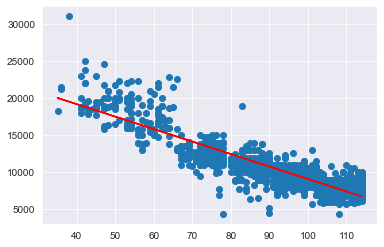

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 25874.2-168.2*X_train, 'r')
plt.show()

In [36]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


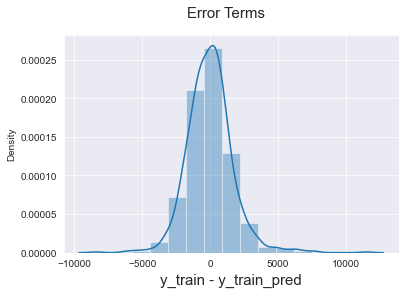

In [37]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [ ]:
Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
The residuals are following the normally distributed with a mean 0. All good!



In [ ]:
"""
Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.



In [38]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)



C:\Users\krish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

y_pred.head()



594     11745.006989
754      8717.316029
630     10231.161509
1259     8212.700870
903      9221.931189
dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
#Looking at the RMSE


#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1891.0671919219772

In [42]:
#Checking the R-squared on the test set

r_squared = r2_score(y_test, y_pred)
r_squared

0.7479977884655666

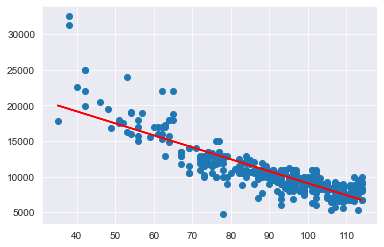

In [43]:
#Visualizing the fit on the test set

plt.scatter(X_test, y_test)
plt.plot(X_test, 25874.2-168.2 * X_test, 'r')
plt.show()

In [ ]:
Does scaling have an impact on the model? When should I scale?






While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:

Min-Max Scaling
Standard Scaling

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [45]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [46]:
X_train_scaled.shape

(1077, 1)

In [47]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [ ]:
X...... x-xmean/x_sd

In [48]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: -1.1215623498534542e-16 1.0
mean and sd for y_train_scaled: -6.597425587373261e-18 1.0


In [49]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

In [50]:
lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [51]:
# Check the parameters
lr_scaled.params

array([-6.93889390e-18, -8.80690216e-01])

In [52]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3716.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:32:31   Log-Likelihood:                -723.47
No. Observations:                1077   AIC:                             1451.
Df Residuals:                    1075   BIC:                             1461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.014   -4.8e-16      1.0